<a href="https://colab.research.google.com/github/ChiragSharmaa02/Student_Performance_analysis/blob/main/Student_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we devlop a machine learing model for Student performance, So we can predict grades and what factor effecting student performance.

In [105]:
## Impoting Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [106]:
## mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
## Read our dataset

df = pd.read_csv("/content/drive/MyDrive/StudentsPerformance (1).csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [108]:
## In this dataset we have 1000 rows and 8 Columns
## Now check how much unique value we have in our objective dataset
df.select_dtypes("object").nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [109]:
## Till now we obeserve our data in unique value of objective data last chec any misisng value
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## we have clean data without any null/NA value.
## Now Add a Grade scetion where we Add a Percentage and Set A grade column For better understanding for student performance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


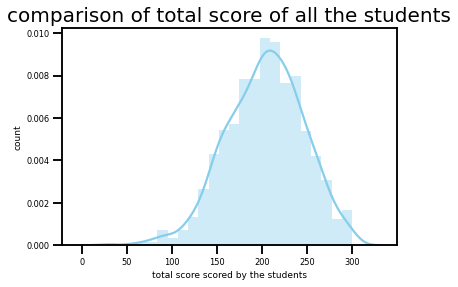

In [110]:
## Creating Total score coloumn in our dataset and visulise by Distplot.
df['Total_score']= df['math score'] + df['reading score'] + df['writing score']
sns.distplot(df['Total_score'], color = 'Skyblue')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


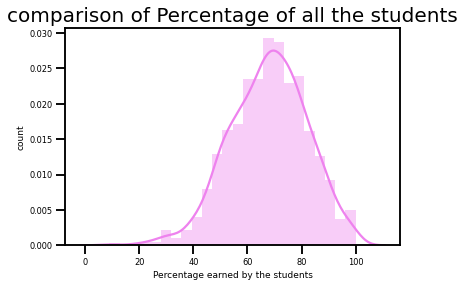

In [111]:
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3
sns.distplot(df['Percentage'], color = 'Violet')

plt.title('comparison of Percentage of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage earned by the students')
plt.ylabel('count')
plt.show()

In [112]:
## Now Set a grade system
def Grade(Percentage):
    if (Percentage >= 95):return 'O'        # Oustanding
    if (Percentage >= 81):return 'A'        # Very Good
    if (Percentage >= 71):return 'B'        # Good
    if (Percentage >= 61):return 'C'        # Average
    if (Percentage >= 51):return 'D'        # Sufficient
    if (Percentage >= 41):return 'E'        # Passing
    else: return 'F'                        # Fail
    
df["grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)     # Deploying grade in our data with Percentage
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,229,76.333333,B


In [113]:
df['grade'].value_counts()

C    258
B    255
D    188
A    157
E     86
F     34
O     22
Name: grade, dtype: int64

In [114]:
df.describe()

,math score,reading score,writing score,Total_score,Percentage
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


#Data Visualization

(-1.1094170092798779,
 1.1004484290133276,
 -1.1137797445749393,
 1.107038776136398)

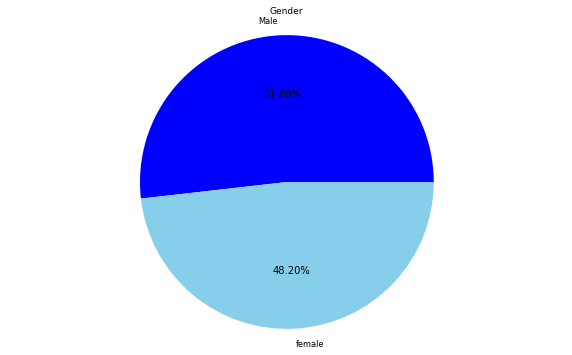

In [115]:
plt.figure(figsize= (10,6))
label= ['Male', 'female']
plt.pie(df['gender'].value_counts(),labels=label,autopct='%1.2f%%',colors=['blue','skyblue'])
plt.title('Gender')
plt.axis('equal')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Upper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


[Text(0, 0.5, 'COUNT'), Text(0.5, 0, 'GRADE')]

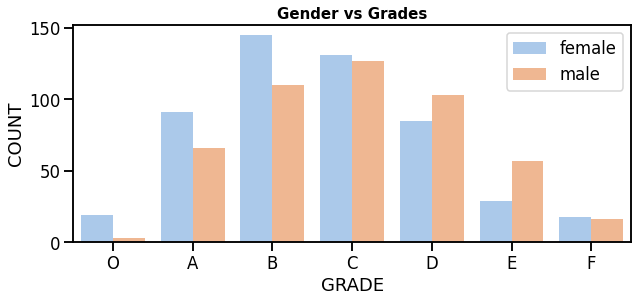

In [116]:
# Try to See gender and grade relation
plt.figure(figsize=(10,4))
sns.set_context('talk',font_scale=1)
sns.set_palette('pastel')
ax= sns.countplot(x='grade',hue = 'gender',data= df, order= ["O","A","B","C","D","E","F"])
ax.legend(loc='Upper right', frameon = True)
plt.title('Gender vs Grades', fontsize=15, fontweight='bold')
ax.set(xlabel='GRADE',ylabel='COUNT')

Text(0.5, 1.0, 'Score Density Plot')

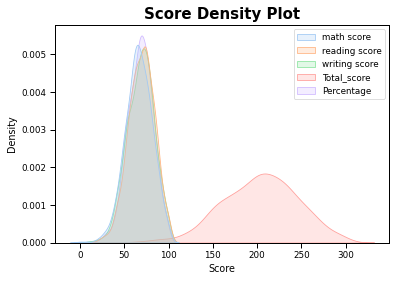

In [117]:
## Now checking different marks density in graph
sns.set_context('paper',font_scale = 1)
sns.kdeplot(data=df,shade=True)
plt.xlabel('Score')
plt.title('Score Density Plot',fontsize= 15, fontweight = 'bold')


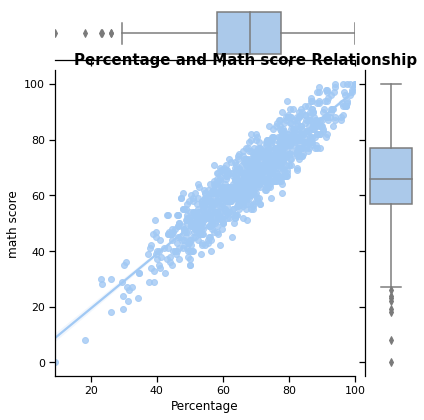

In [118]:
sns.set_context("notebook")
sns.set_palette("pastel")
g = sns.JointGrid(data=df, x="Percentage", y="math score")
g.plot(sns.regplot, sns.boxplot)
plt.title('Percentage and Math score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

Text(1.0, 1.3, 'Percentage and Reading score Relationship')

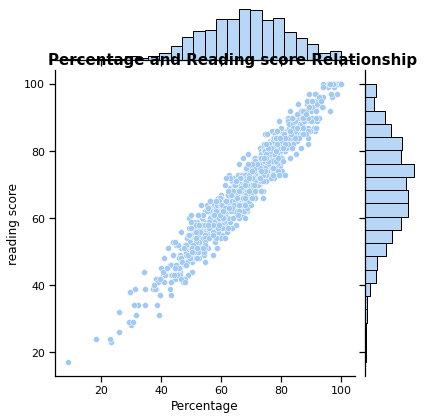

In [119]:
sns.set_context("notebook")
sns.set_palette("pastel")
sns.jointplot(data=df, x="Percentage", y="reading score")
plt.title('Percentage and Reading score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
  

Text(1.0, 1.3, 'Percentage and Writing score Relationship')

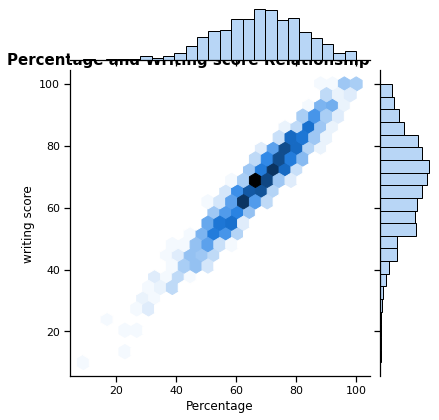

In [120]:
sns.set_context("notebook")
sns.set_palette("pastel")
sns.jointplot(data=df, x="Percentage", y="writing score",kind='hex')
plt.title('Percentage and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
  

Text(0.5, 1.0, 'Percentage vs Test Preparation')

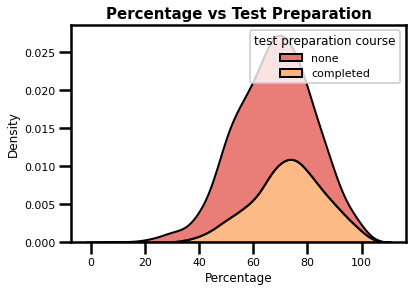

In [121]:
sns.set_context('poster',font_scale=0.5)
sns.set_palette("Spectral")
sns.kdeplot(x="Percentage",hue= 'test preparation course', data=df,multiple='stack')
plt.title('Percentage vs Test Preparation',fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'parental level of education vs percentage')

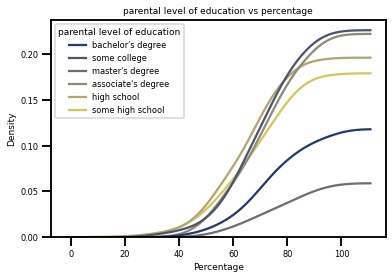

In [122]:
sns.set_context("talk",font_scale=0.5)
sns.set_palette("cividis")
sns.kdeplot(data=df,x='Percentage',hue='parental level of education',cumulative=True,common_grid=True)
plt.title("parental level of education vs percentage")

In [123]:
## Label Encoding get encoding ob
from sklearn.preprocessing import LabelEncoder
#creating encoder
le = LabelEncoder()
## Encoding for Test Preparation Course
df['test preparation course'] = le.fit_transform(df['test preparation course'])
##for Lunch
df['lunch']= le.fit_transform(df['lunch'])
##for gender
df['gender']= le.fit_transform(df['gender'])

df['parental level of education'] = le.fit_transform(df['parental level of education'])

df['grade'] = le.fit_transform(df['grade'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)




In [124]:
df['math score'] = le.fit_transform(df['math score'])

# label encoding for pass_reading
df['reading score'] = le.fit_transform(df['reading score'])

# label encoding for pass_writing
df['writing score'] = le.fit_transform(df['writing score'])

                

In [125]:
df.drop('Total_score',axis=1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,0,2,1,1,1,52,44,50,72.666667,1
1,0,3,4,1,0,49,62,64,82.333333,0
2,0,2,3,1,1,70,67,69,92.666667,0
3,1,1,0,0,1,27,29,20,49.333333,4
4,1,3,4,1,1,56,50,51,76.333333,1
...,...,...,...,...,...,...,...,...,...,...
995,0,5,3,1,0,68,70,71,94.000000,0
996,1,3,2,0,1,42,27,31,57.333333,3
997,0,3,2,0,0,39,43,41,65.000000,2
998,0,4,4,1,0,48,50,53,74.333333,1


In [133]:
x= df.iloc[:,:14]
y= df.iloc[:,0]

print(x.shape)
print(y.shape)

(1000, 11)
(1000,)


In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 11)
(750,)
(250, 11)
(250,)


In [135]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
min = MinMaxScaler()
x_train = min.fit_transform(X_train)
x_test = min.transform(X_test)

In [130]:
from sklearn.decomposition import PCA
# creating a principal component analysis model
pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)




[2.64224319e-01 2.15945318e-01 1.98498283e-01 1.24289903e-01
 9.81252541e-02 7.01052385e-02 2.44652724e-02 2.88203954e-03
 1.40037622e-03 6.39962723e-05 3.59269866e-33]


In [131]:
# creating a principal component analysis model
pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


In [132]:
#modeling

from sklearn.linear_model import LinearRegression 

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)


print('Training Accuracy:', model.score(x_train,y_train) )
print('Test Acuracy:', model.score(x_test,y_test))

Training Accuracy: 0.9816352006222765
Test Acuracy: 0.9793048189771666
